In [1]:
import xarray as xr
from pcv.process import standardise_monthly, detrend_seasons, aggregate_seasons, select_data
import matplotlib.pylab as plt

In [2]:

temp_path = "/Users/anand/Documents/data/project_3_data/t2m.monthly.era5.europe.1981-2020.nc"
tp_path = "/Users/anand/Documents/data/project_3_data/tp.monthly.era5.europe.1981-2020.nc"
rad_path = "/Users/anand/Documents/data/project_3_data/ssrd.monthly.era5.europe.1981-2020.nc"
lai_path = "/Users/anand/Documents/data/project_3_data/GLOBMAP_LAI.monthly.1982-2020_europe_025deg.nc"
swvlall_path = "/Users/anand/Documents/data/project_3_data/swvlall.monthly.era5.europe.1981-2020.nc"
vpd_path = "/Users/anand/Documents/data/project_3_data/vpd_cf.monthly.era5.europe.1981-2020.nc"

temp_data = xr.open_dataset(temp_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(rad_path)
swvlall_data = xr.open_dataset(swvlall_path)
lai_data = xr.open_dataset(lai_path)
vpd_data = xr.open_dataset(vpd_path)


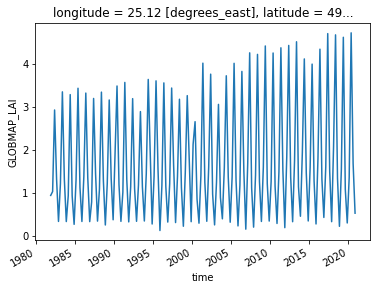

In [3]:
aggregated_temp = aggregate_seasons(temp_data)
aggregated_tp = aggregate_seasons(tp_data)
aggregated_ssrd = aggregate_seasons(ssrd_data)
aggregated_swvlall = aggregate_seasons(swvlall_data)
aggregated_lai = aggregate_seasons(lai_data)
aggregated_vpd = aggregate_seasons(vpd_data)


aggregated_lai["GLOBMAP_LAI"][:, 100, 140].plot()

Function detrend Took 0.0924 seconds
Function detrend Took 0.0731 seconds
Function detrend Took 0.0730 seconds
Function detrend Took 0.1266 seconds
Function detrend Took 0.0777 seconds
Function detrend Took 0.0765 seconds
Function detrend Took 0.0585 seconds
Function detrend Took 0.0975 seconds
Function detrend Took 0.0851 seconds
Function detrend Took 0.0936 seconds
Function detrend Took 0.0962 seconds
Function detrend Took 0.0968 seconds
Function detrend Took 0.2175 seconds
Function detrend Took 0.2212 seconds
Function detrend Took 0.2341 seconds
Function detrend Took 0.2286 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.3272 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.3854 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.4189 seconds
Function detrend Took 0.3234 seconds
Function detrend Took 0.0660 seconds
Function detrend Took 0.0730 seconds
Function detrend Took 0.0616 seconds
Function detrend Took 0.0844 seconds


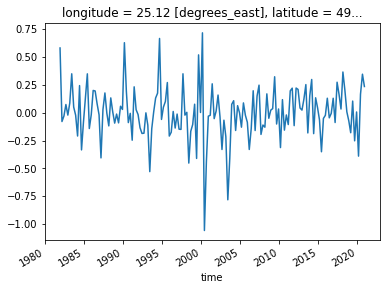

In [4]:
detrended_temp = detrend_seasons(aggregated_temp, deg=1, var="t2m")
detrended_tp = detrend_seasons(aggregated_tp, deg=1, var="tp")
detrended_ssrd = detrend_seasons(aggregated_ssrd, deg=1, var="ssrd")
detrended_swvlall = detrend_seasons(aggregated_swvlall, deg=1, var="swvlall")
detrended_lai = detrend_seasons(aggregated_lai, deg=1, var="GLOBMAP_LAI")
detrended_vpd = detrend_seasons(aggregated_vpd, deg=1, var="vpd_cf")

detrended_lai[:, 100, 140].plot()

In [6]:
detrended_temp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_temp.nc")
detrended_tp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_tp.nc")
detrended_ssrd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_ssrd.nc")
detrended_swvlall.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_swvlall.nc")
detrended_lai.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_lai.nc")
detrended_vpd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/detrended_vpd.nc")

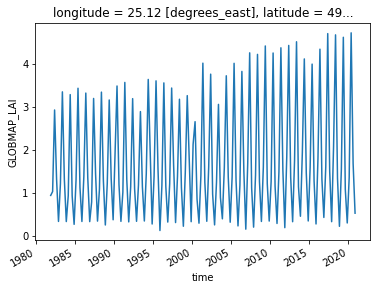

In [9]:
aggregated_lai["GLOBMAP_LAI"][:, 100, 140].plot()

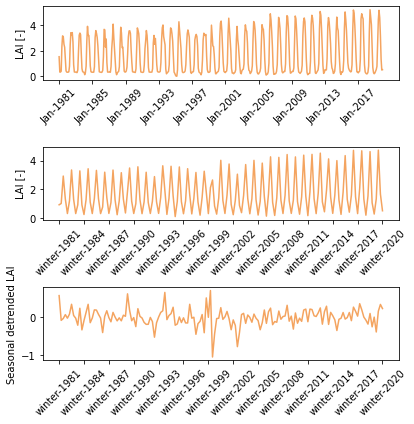

In [30]:
# aggregated_lai["GLOBMAP_LAI"][:, 100, 140].plot()
import numpy as np

lai = lai_data["GLOBMAP_LAI"][:, 100, 140].values
agg_lai = aggregated_lai["GLOBMAP_LAI"][:, 100, 140].values

month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
season = ["winter", "spring", "summer", "autumn"]

month_xticks_labels = []
season_xticks_labels = []

for i in range(40):
    month_xticks_labels.extend([each + f"-{1981+i}" for j, each in enumerate(month) if (12*i+j)%48==0 ])
    season_xticks_labels.extend([each + f"-{1981+i}" for j, each in enumerate(season) if (4*i+j)%12==0 ])

month_xticks = np.arange(0, lai.shape[0], 48)
season_xticks = np.arange(0, agg_lai.shape[0], 12)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (6,6))
ax1.plot(lai, c = "sandybrown", linestyle="-")
ax1.set_xticks(month_xticks)
ax1.set_xticklabels(month_xticks_labels[:month_xticks.shape[0]], rotation=45)
ax1.set_ylabel("LAI [-]")

ax2.plot(agg_lai, c = "sandybrown")
ax2.set_xticks(season_xticks)
ax2.set_xticklabels(season_xticks_labels[:season_xticks.shape[0]], rotation=45)
ax2.set_ylabel("LAI [-]")

ax3.plot(detrended_lai[:, 100, 140].values, c = "sandybrown")
ax3.set_xticks(season_xticks)
ax3.set_xticklabels(season_xticks_labels[:season_xticks.shape[0]], rotation=45)
ax3.set_ylabel("Seasonal detrended LAI")
plt.tight_layout()
plt.savefig("images/preprocess.png")


In [15]:
season_xticks

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300,
       312, 324, 336, 348, 360, 372, 384, 396, 408, 420, 432, 444, 456])

In [ ]:
(i*12+j)%48==0]


In [59]:
i=0
j=1
(i*12+j)%48==0

False